### Walmart Sales Data Analysis

In [8]:
## IMPORTS

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### Reading the data

In [4]:
df = pd.read_csv("C://Users//Nandhika//Documents//walmartsalesanalysis//data//walmart-10k-sales-datasets//Walmart.csv")

In [ ]:
df.head(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [9]:
# Checking the data types of each feature
df.info()
df['Branch'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


Branch
WALM058    240
WALM009    238
WALM030    233
WALM069    224
WALM074    212
          ... 
WALM013     57
WALM031     56
WALM034     56
WALM014     52
WALM092     51
Name: count, Length: 100, dtype: int64

In [5]:
df['unit_price'] = df['unit_price'].str.strip('$').astype(float)

In [6]:
df.head(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  float64
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 863.9+ KB


In [ ]:
# df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
# df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

#### What to do with the missing values?

In [12]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

#### Exploring trends

In [9]:
df.describe()

,invoice_id,unit_price,quantity,rating,profit_margin
count,10051.000000,10020.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,50.630053,2.353493,5.825659,0.393791
std,2901.174372,21.197783,1.602658,1.763991,0.090669
min,1.000000,10.080000,1.000000,3.000000,0.180000
25%,2513.500000,32.000000,1.000000,4.000000,0.330000
50%,5026.000000,51.000000,2.000000,6.000000,0.330000
75%,7538.500000,69.000000,3.000000,7.000000,0.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000


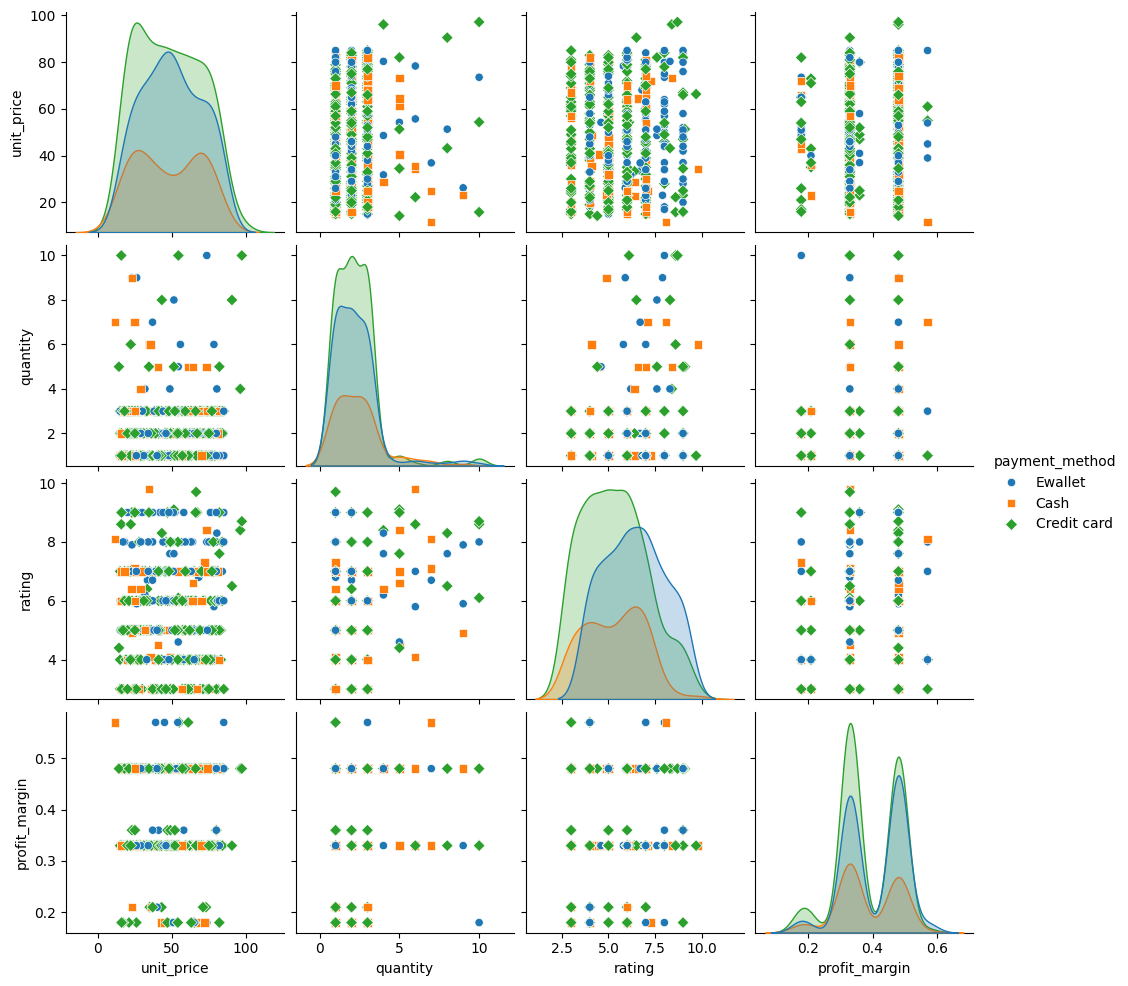

In [ ]:
num_cols = ['unit_price','quantity','rating','profit_margin']
cat_cols = ['Branch','category','payment_method']
sns.pairplot(df[num_cols + ['payment_method']].sample(500), hue='payment_method', markers=['o','s','D'])
plt.show()

#### Distribution of Numerical features

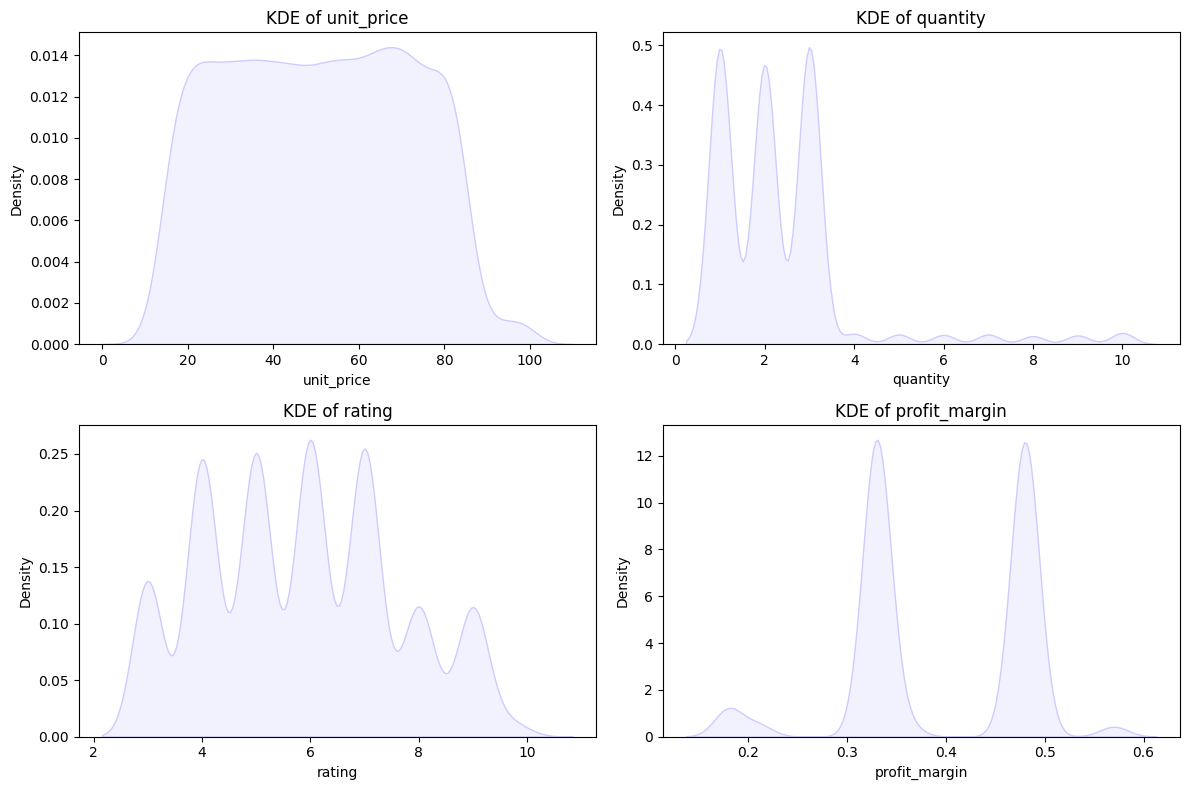

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # create 2x2 grid
axes = axes.flatten()  # flatten to easily index

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i],color="#ccccff")
    axes[i].set_title(f'KDE of {col}')

plt.tight_layout()
plt.show()

#### Analyzing the categorical features

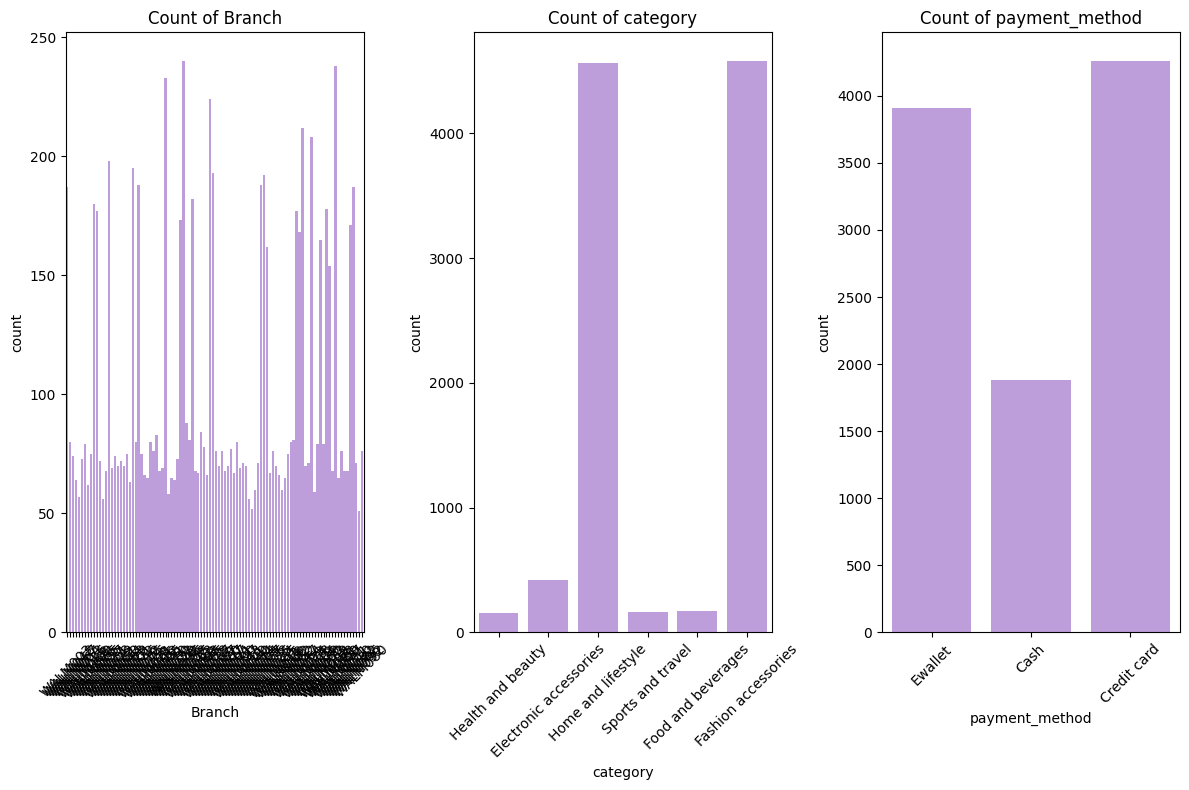

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))  # 1x3 layout, ax is already 1D

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i], color="#BF94E4")
    ax[i].set_title(f"Count of {col}")
    ax[i].tick_params(axis='x', rotation=45)  # rotates x-axis labels by 45 degrees

plt.tight_layout()
plt.show()


#### How profit margin, unit price, or rating vary by category/payment method/branch

<Axes: xlabel='payment_method', ylabel='unit_price'>

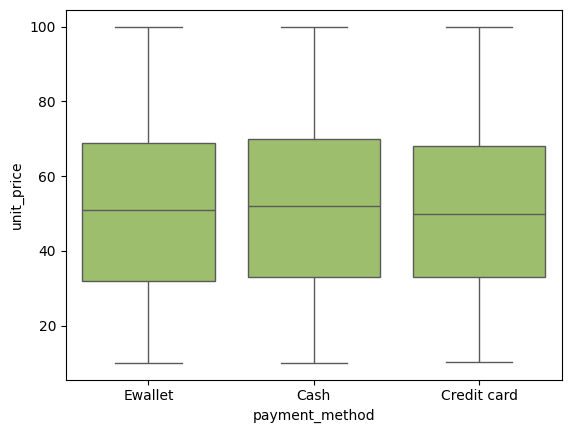

In [23]:
sns.boxplot(x='payment_method', y='unit_price', data=df, color= "#A0CB60")

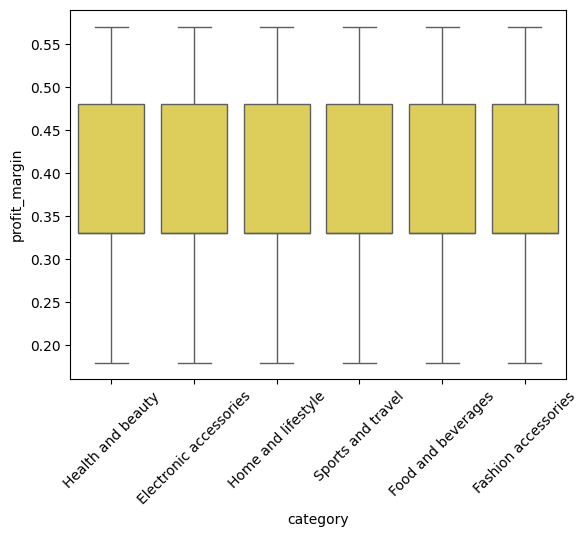

In [25]:
sns.boxplot(x='category', y='profit_margin', data=df, color = "#F2DE46")
plt.tick_params(axis='x', rotation=45)

#### linear relationships between unit_price, quantity, rating, profit_margin
Identify which features are strongly related

<Axes: >

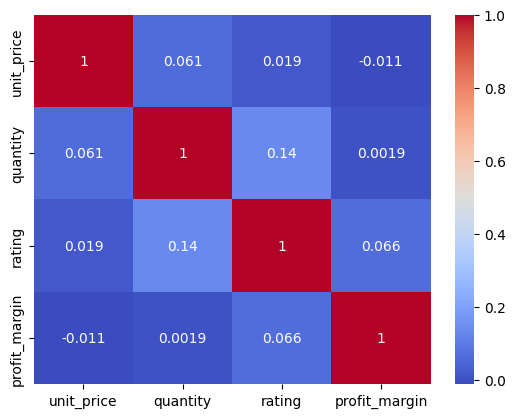

In [26]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
